In [1]:
import torch
from torch import nn # nn has all building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.2.1+cu121'

## Data Preparation

Create some data using linear regression for the sake of the tutorial

y = mx + c

We'll use linear regression formula to make a straight line with known parameters

a = weight
b = bias

In [2]:
## Parameters

weight = 0.7
bias = 0.3

# Create

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
 len(X),len(y)

(50, 50)

### Splitting data into training and testing

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

Visualizing the data

In [5]:
def plot_preds (train_data = X_train,
                train_labels = y_train,
                test_data = X_test,
                test_labels = y_test,
                predictions = None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,
            c = "b",
            s = 4,
            label = "training data")

  ## Plot test data
  plt.scatter(test_data,test_labels,
            c = "r",
            s = 4,
            label = "testing data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c ="g",s=4,label = "Predictions")
  plt.legend(prop={"size":14})

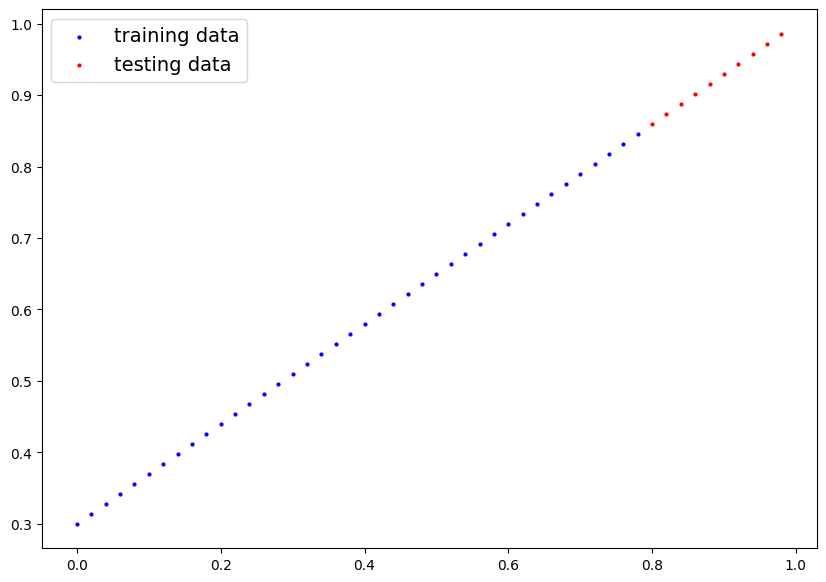

In [6]:
plot_preds()

## Build pytorch model


In [7]:
# Create linear regression model class
from torch import nn
class LinearRegressionModel(nn.Module): # <- almost everything in pytoch inherits from nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,
                                         dtype=torch.float))

  ## Foward method to define computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [8]:
### Pytorch model building essentials

In [9]:
# Create a random seed
torch.manual_seed(32423)

## Create an instance of the model (this is a subclass of nn.Module)

model_0 = LinearRegressionModel()

# Check parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.0227], requires_grad=True),
 Parameter containing:
 tensor([1.6429], requires_grad=True)]

In [10]:
## List named parameters

model_0.state_dict()

OrderedDict([('weights', tensor([0.0227])), ('bias', tensor([1.6429]))])

In [11]:
weight,bias

(0.7, 0.3)

In [12]:
## Making predictions using 'torch.inference_mode()'

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

#with torch.no_grad():
#  y_preds1 = model_0(X_test)

#y_preds1

tensor([[1.6610],
        [1.6615],
        [1.6620],
        [1.6624],
        [1.6629],
        [1.6633],
        [1.6638],
        [1.6642],
        [1.6647],
        [1.6651]])

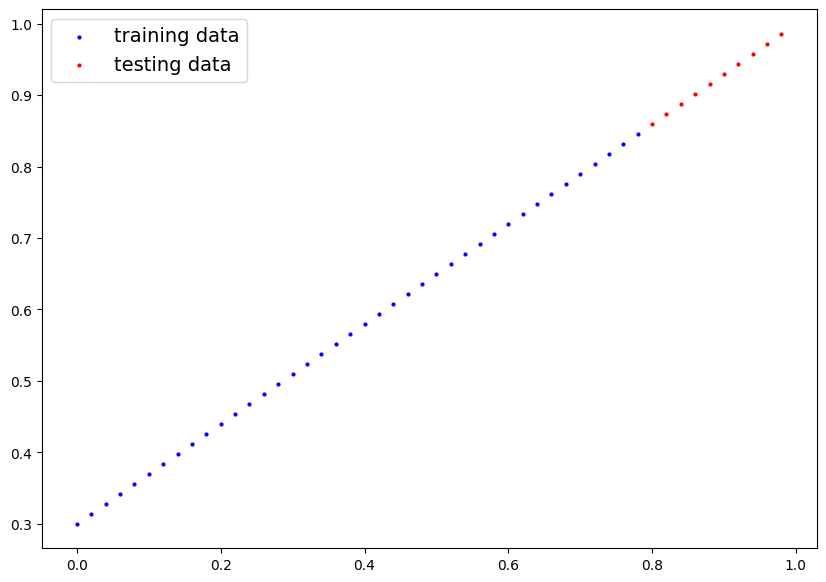

In [13]:
plot_preds()

### Train model

Requires

* Loss function
* Optimizer
* Training loop
* Testing loop

In [14]:
## Train model
list(model_0.parameters())

[Parameter containing:
 tensor([0.0227], requires_grad=True),
 Parameter containing:
 tensor([1.6429], requires_grad=True)]

In [15]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.0227])), ('bias', tensor([1.6429]))])

In [16]:
# Setup a loss function

loss_fn = nn.L1Loss()
loss_fn

L1Loss()

In [17]:
# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01)

### Building a training loop

Required things for the training loop
0. Loop through the data
1. Forward pass (this involves data moving through our model's forward() function) - forward propogation
2. Calculate the loss(compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss
5. Optimizer step - use optimizer on the model parameters to try and improve the loss (gradient descent)


epoch - one loop through the data

In [18]:
## Epoch
### Training loop
epochs = 1000
epoch_count = []
loss_vals = []
test_loss_vals = []
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # Sets all parameters with reqd_grad = TRUE

  # 1. Forward pass

  y_pred = model_0(X_train)

  # 2. Calc loss function
  loss = loss_fn(y_pred,y_train)


  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (Perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so.. we have to zero them above in step 3 for the next iteration of the loop. In other words, performs back propagation on the loss function

  ### Testing loop

  model_0.eval() #turns off different settings in the model not needed for evaluation/testing like batchNorm/dropout layers
  with torch.inference_mode(): # turns off gradient tracking
    # 1. Forward pass in testing mode
    test_pred = model_0(X_test)

    # 2. Calc test loss
    test_loss = loss_fn(test_pred,y_test)
    if epoch % 100 == 0:
      epoch_count.append(epoch)
      loss_vals.append(loss)
      test_loss_vals.append(test_loss)
      print(f"Epoch: {epoch} | Loss: {test_loss}")


    # 3.

Epoch: 0 | Loss: 0.7266151905059814
Epoch: 100 | Loss: 0.35678794980049133
Epoch: 200 | Loss: 0.3862830698490143
Epoch: 300 | Loss: 0.3063073754310608
Epoch: 400 | Loss: 0.22633180022239685
Epoch: 500 | Loss: 0.1456671506166458
Epoch: 600 | Loss: 0.06568928807973862
Epoch: 700 | Loss: 0.00439375638961792
Epoch: 800 | Loss: 0.00439375638961792
Epoch: 900 | Loss: 0.00439375638961792


In [19]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6905])), ('bias', tensor([0.2994]))])

In [20]:
weight, bias

(0.7, 0.3)

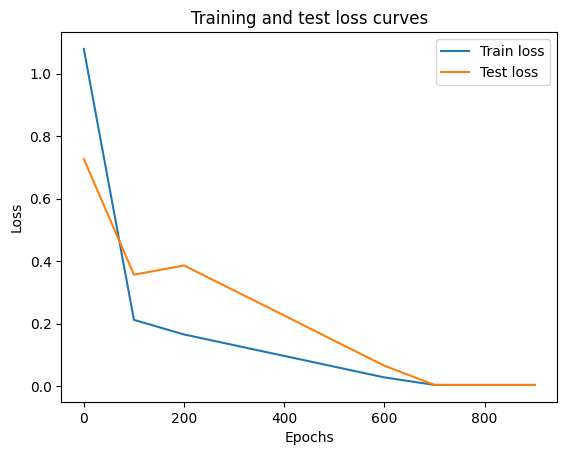

In [21]:
import numpy as np

# plot loss curve
plt.plot(epoch_count,np.array(torch.tensor(loss_vals).cpu().numpy()),label ="Train loss")
plt.plot(epoch_count,test_loss_vals,label ="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

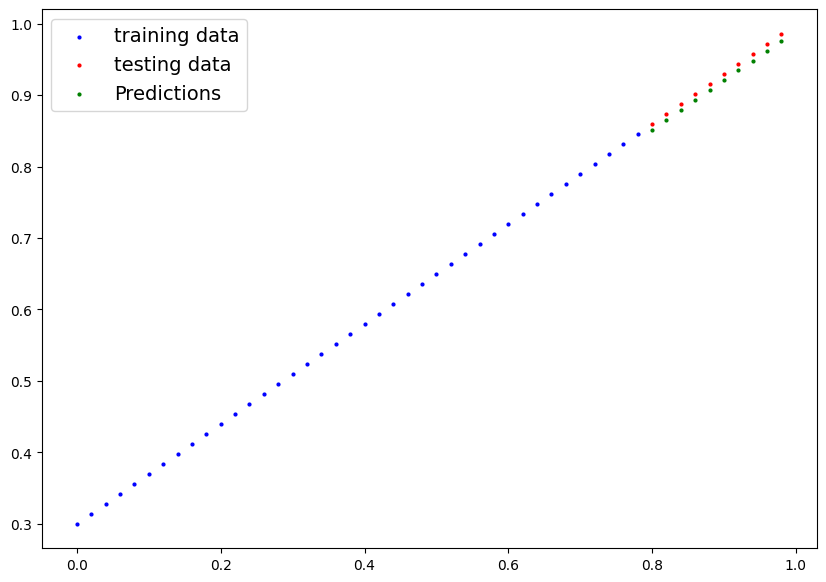

In [22]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

plot_preds(predictions=y_preds_new)

### Saving a model

3 methods for saving and loading models

* `torch.save()` - allows saving in pickle format
* `torch.load()` - loads a pytorch object
*  `torch.nn.Module.load_state_dict()` - allows to load a model's saved state dictionary (recommended)

In [23]:
## Saving the model

from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# 3. Save model state dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving the model to: models/01_pytorch_workflow_model_0.pth


### Loading the PyTorch model

In [24]:
# Loading the state dict

## 1. To load: instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

## Load the saved state_dict of the model_0 (This will ipdate the new instnce with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [25]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6905])), ('bias', tensor([0.2994]))])

In [26]:
# Make predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8518],
        [0.8656],
        [0.8794],
        [0.8932],
        [0.9070],
        [0.9208],
        [0.9346],
        [0.9484],
        [0.9623],
        [0.9761]])

In [27]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8518],
        [0.8656],
        [0.8794],
        [0.8932],
        [0.9070],
        [0.9208],
        [0.9346],
        [0.9484],
        [0.9623],
        [0.9761]])

In [28]:
## Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Putting it all together

In [29]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## check pytorch version

torch.__version__

'2.2.1+cu121'

Create device-agnostic code

This means if we've got access to a GPU our code will use it (for faster computing).
If no GPU is available, use cpu

In [30]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using: {device}")

Using: cpu


In [31]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


#### Data

In [32]:
## Create data using linear regression formula y = weight * x + bias

weight, bias = 0.7,0.3


In [33]:
## Create a range of values

start = 0
end = 1
step = 0.02

## create X and y (features and labels)

X = torch.arange(start,end,step).unsqueeze(dim =1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [34]:
# Split data
train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

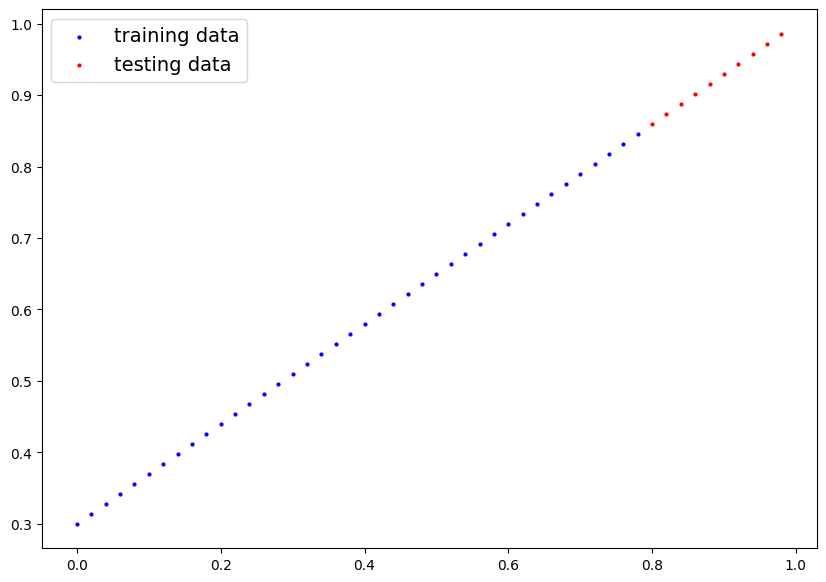

In [35]:
## Plot the data

plot_preds(X_train,y_train,X_test,y_test)

##### Build a PyTorch model

In [36]:
# Create s linear module  by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
  ## Use nn.Lienar() for creating the model parameters / linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,
                                out_features=1)
  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Setting the seed

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [37]:
## Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [38]:
## Set the model to use the target device.
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### Training

* Loss function
* Optimizer
* Training loop
* Testing loop

In [39]:
## Setup a loss function
loss_fn = nn.L1Loss() # same as MAE

## Setup optimizer
optimizer = torch.optim.SGD(params= model_1.parameters(), lr= 0.01)

In [40]:
## Training loop
torch.manual_seed(312)

epochs = 10000

### Device agnostic code for the data
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  ## 1. Forward pass

  y_pred = model_1(X_train)

  ## 2. Calculate the Loss
  loss = loss_fn(y_pred,y_train)

  ## 3. Optimizer zero grad
  optimizer.zero_grad

  ## 4. Back-propagation
  loss.backward()

  ## 5. Optimizer step
  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  ## Print the epochs

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss:{loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss:0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss:0.07653242349624634 | Test Loss: 0.26966753602027893
Epoch: 20 | Loss:0.5755313634872437 | Test Loss: 0.7160065770149231
Epoch: 30 | Loss:0.07554607093334198 | Test Loss: 0.15370555222034454
Epoch: 40 | Loss:0.593203067779541 | Test Loss: 0.629802405834198
Epoch: 50 | Loss:0.04123998433351517 | Test Loss: 0.21425862610340118
Epoch: 60 | Loss:0.5604730248451233 | Test Loss: 0.6811316609382629
Epoch: 70 | Loss:0.07239393144845963 | Test Loss: 0.1721532642841339
Epoch: 80 | Loss:0.5900508761405945 | Test Loss: 0.648250162601471
Epoch: 90 | Loss:0.04439214617013931 | Test Loss: 0.19581091403961182
Epoch: 100 | Loss:0.563625156879425 | Test Loss: 0.6626839637756348
Epoch: 110 | Loss:0.06924178451299667 | Test Loss: 0.19060096144676208
Epoch: 120 | Loss:0.5868987441062927 | Test Loss: 0.6666978001594543
Epoch: 130 | Loss:0.047544289380311966 | Test Loss: 0.17736320197582245
Epoch: 140 | Loss:0.566777348518371

In [41]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5849]])),
             ('linear_layer.bias', tensor([0.7610]))])

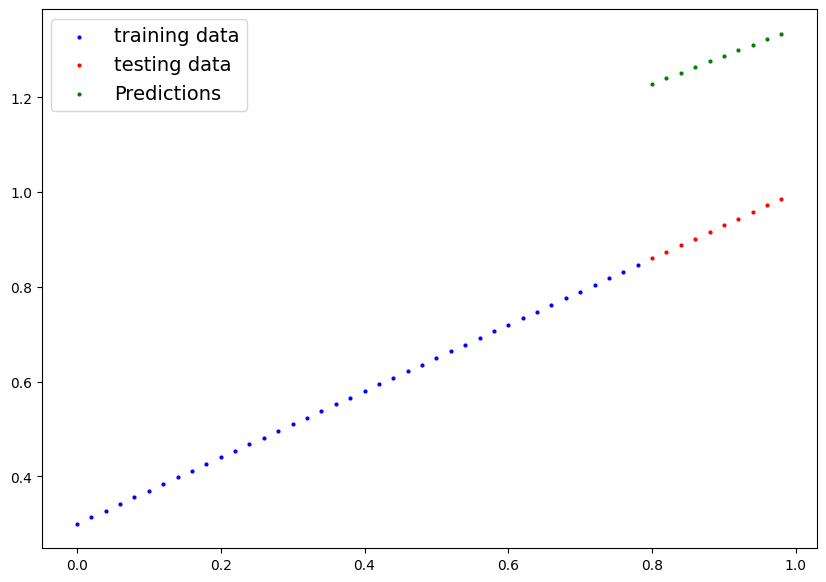

In [42]:
plot_preds(predictions=test_pred)

In [43]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[1.2289],
        [1.2406],
        [1.2523],
        [1.2640],
        [1.2757],
        [1.2874],
        [1.2991],
        [1.3108],
        [1.3225],
        [1.3342]])

### Saving the model

In [44]:
from pathlib import Path

## 1. Create models directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

## 2. Create model save path

MODEL_NAME = "model_01.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

## 3. Save model state dict
print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to:models/model_01.pth


In [45]:
## Load a model

## Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

## Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

## Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [46]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [47]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5849]])),
             ('linear_layer.bias', tensor([0.7610]))])

In [48]:
## Evaluate loaded model

loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])